# Clustering Penguins Species

Bu projemizde penguenlerin özelliklerine göre kümeleme yapacağız.

<img src="https://fizikist.com/uploads/img/1659181884_bilim-insanlari-penguen-dnasini-analiz-ettiler-ve-oldukca-olaganustu-bir-sey-buldularjpeg.jpg">

<a href="https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species/data">Dataya Buradan Erişebilirsiniz</a>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### EDA

In [2]:
df=pd.read_csv("penguins.csv")

In [3]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.shape

(344, 5)

In [5]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [7]:
df["culmen_length_mm"].value_counts()

culmen_length_mm
41.1    7
45.2    6
39.6    5
50.5    5
50.0    5
       ..
35.6    1
36.8    1
43.1    1
38.5    1
49.9    1
Name: count, Length: 164, dtype: int64

In [8]:
df["culmen_depth_mm"].value_counts()

culmen_depth_mm
17.0    12
18.6    10
17.9    10
15.0    10
18.5    10
        ..
13.2     1
14.9     1
21.5     1
20.2     1
17.4     1
Name: count, Length: 80, dtype: int64

In [9]:
df["flipper_length_mm"].value_counts()

flipper_length_mm
 190.0     21
 195.0     17
 187.0     16
 193.0     15
 210.0     14
 191.0     13
 215.0     12
 196.0     10
 197.0     10
 185.0      9
 208.0      8
 220.0      8
 216.0      8
 198.0      7
 230.0      7
 186.0      7
 212.0      7
 192.0      7
 181.0      7
 184.0      7
 189.0      7
 199.0      6
 217.0      6
 213.0      6
 214.0      6
 188.0      6
 201.0      6
 222.0      6
 180.0      5
 221.0      5
 194.0      5
 203.0      5
 218.0      5
 219.0      5
 209.0      5
 178.0      4
 202.0      4
 225.0      4
 228.0      4
 200.0      4
 205.0      3
 224.0      3
 182.0      3
 223.0      2
 229.0      2
 211.0      2
 207.0      2
 183.0      2
 231.0      1
-132.0      1
 5000.0     1
 206.0      1
 176.0      1
 174.0      1
 179.0      1
 172.0      1
 226.0      1
Name: count, dtype: int64

In [10]:
df["body_mass_g"].value_counts()

body_mass_g
3800.0    12
3700.0    11
3900.0    10
3950.0    10
3550.0     9
          ..
4475.0     1
3975.0     1
3575.0     1
3850.0     1
5750.0     1
Name: count, Length: 94, dtype: int64

In [11]:
df["sex"].value_counts()

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

### Feature Engineering

In [12]:
df=df.dropna(subset="culmen_length_mm")

In [13]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  7
dtype: int64

In [14]:
d={"MALE":1,"FEMALE":0}

In [15]:
df["sex"]=df["sex"].map(d)

In [16]:
df=df.dropna(subset="sex")

### Modelling

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#wcss= within cluster sum of squares
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(df)
    tahmin=model.predict(df)
    ss1=silhouette_score(df,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.6229735076740957
0.5477927464977835
0.5724230977617364
0.5503471272878904
0.5243812371383447
0.5128099939101074
0.5150093541200426
0.5042280878457085


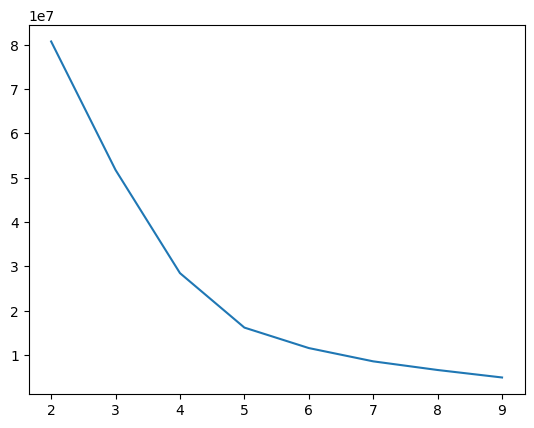

In [19]:
plt.plot(range(2,10),wcss)

In [20]:
from yellowbrick.cluster import KElbowVisualizer

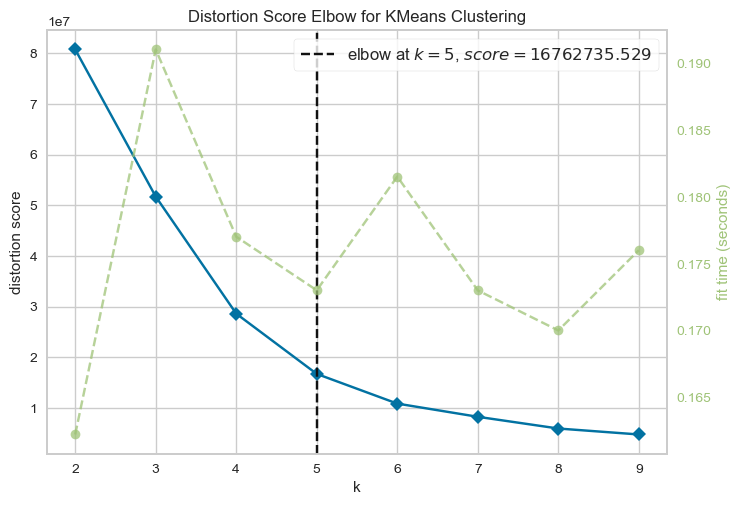

In [21]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(df)
vis.show();

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
model=KMeans(5,random_state=42)

In [24]:
model.fit(df)

KMeans(n_clusters=5, random_state=42)

In [25]:
tahmin=model.predict(df)

In [26]:
silhouette_score(df,tahmin)

0.5478313248830189

In [27]:
df["Cluster"]=tahmin

In [28]:
df["Cluster"].value_counts()

Cluster
0    101
3    100
4     77
1     55
2      1
Name: count, dtype: int64

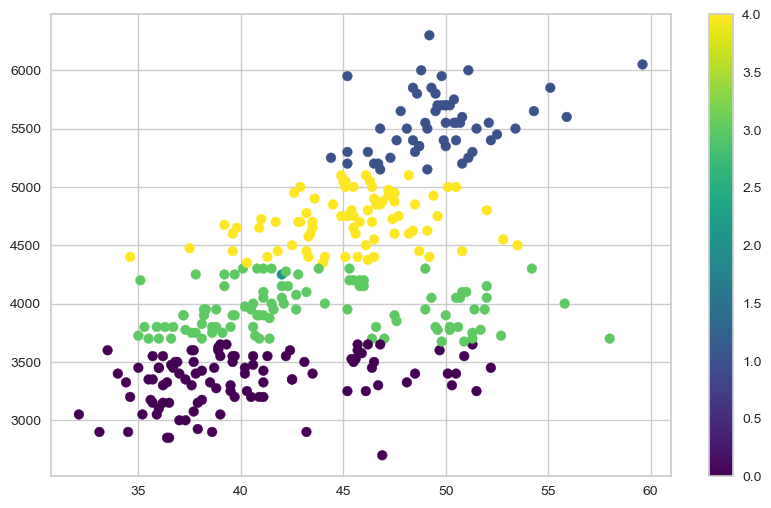

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(df["culmen_length_mm"],df["body_mass_g"], c=tahmin, cmap='viridis')
plt.colorbar()

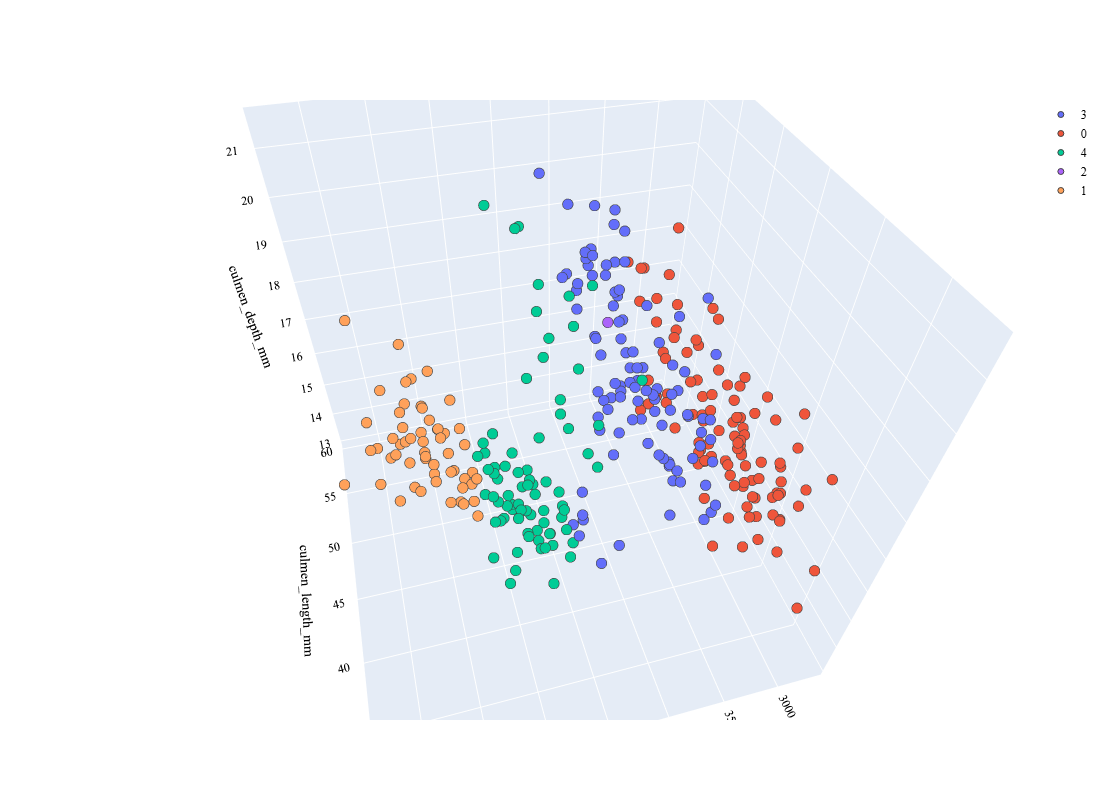

In [32]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(df["Cluster"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = df[df["Cluster"]== i]['culmen_length_mm'],
                                y = df[df["Cluster"] == i]['body_mass_g'],
                                z = df[df["Cluster"] == i]['culmen_depth_mm'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='culmen_length_mm: %{x} <br>body_mass_g %{y} <br>culmen_depth_mm: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'culmen_length_mm', titlefont_color = 'black'),
                                yaxis=dict(title = 'body_mass_g', titlefont_color = 'black'),
                                zaxis=dict(title = 'culmen_depth_mm', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))
# Kaynak:https://thecleverprogrammer.com/2022/10/03/credit-card-clustering-with-machine-learning/

In [34]:
data=linkage(df,method="complete")

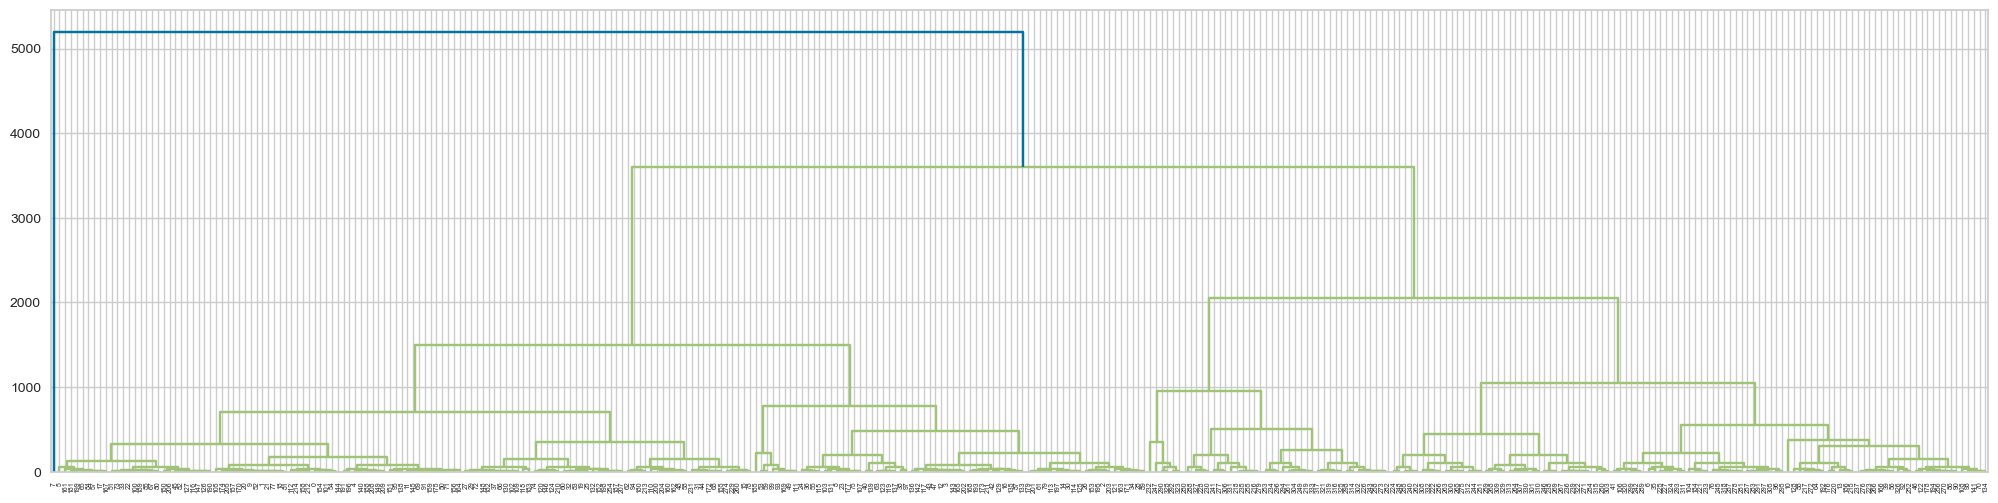

In [35]:
plt.figure(figsize=(25,6))
dendrogram(data);

<Axes: xlabel='Cluster', ylabel='count'>

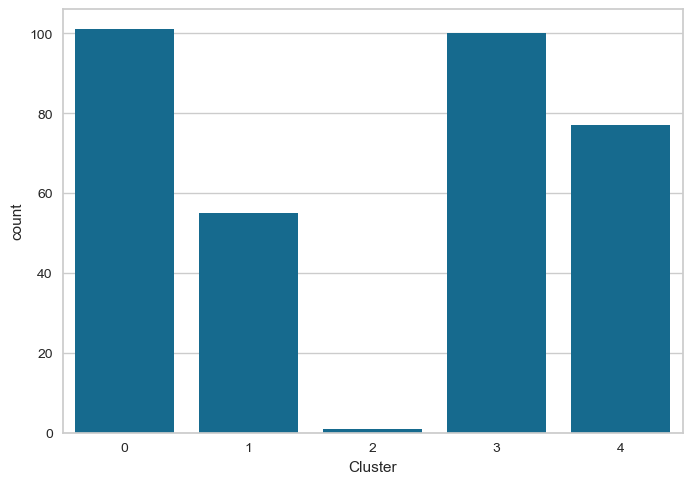

In [36]:
sns.countplot(x=df["Cluster"])

Sonuc olarak dirsek 5 de kırıldığı için 5 küme olusturduk. <br>
0 - 101<br> 3 - 100 <br>4 - 77<br> 1 - 55 <br>2 - 1<br>
küme sayılarımız bu sekilde.
